In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# data = pd.read_csv('D:\Projects\PasswordFeaturesComp4730AbrahamlingamDagatiZoura\data\data2.tsv', delimiter="\t", index_col= 0)
data = pd.read_csv('../data\data2.tsv', delimiter="\t", index_col= 0)

In [3]:
X = data.drop(['Strength','Password'], axis= 1)
print(X.head(), "\n\n---\n\n")
y = data['Strength']
print(y.head())

   Length  #Uppers  #Lowers  #Numbers  #Symbols  SLG_uppers  SLG_lowers  \
0       9        0        2         7         0           0           2   
1      16        5        8         3         0           2           3   
2      12        0       11         1         0           0          11   
3       7        0        6         1         0           0           4   
4      10        0        4         6         0           0           4   

   SLG_numbers  SLG_symbols  FCT_Up  FCT_Lo  FCT_Nu  FCT_Sy  LCT_Up  LCT_Lo  \
0            7            0       0       0       1       0       0       1   
1            2            0       0       1       0       0       1       0   
2            1            0       0       1       0       0       0       0   
3            1            0       0       1       0       0       0       1   
4            6            0       0       1       0       0       0       0   

   LCT_Nu  LCT_Sy  #words  ave_size_of_words  palindrome  
0       0      

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
rf = RandomForestClassifier(max_depth= 5, max_features= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5)

In [5]:
print(f'Train Accuracy: {rf.score(X_train, y_train)}')
print(f'Test Accuracy: {rf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 1.0


In [6]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


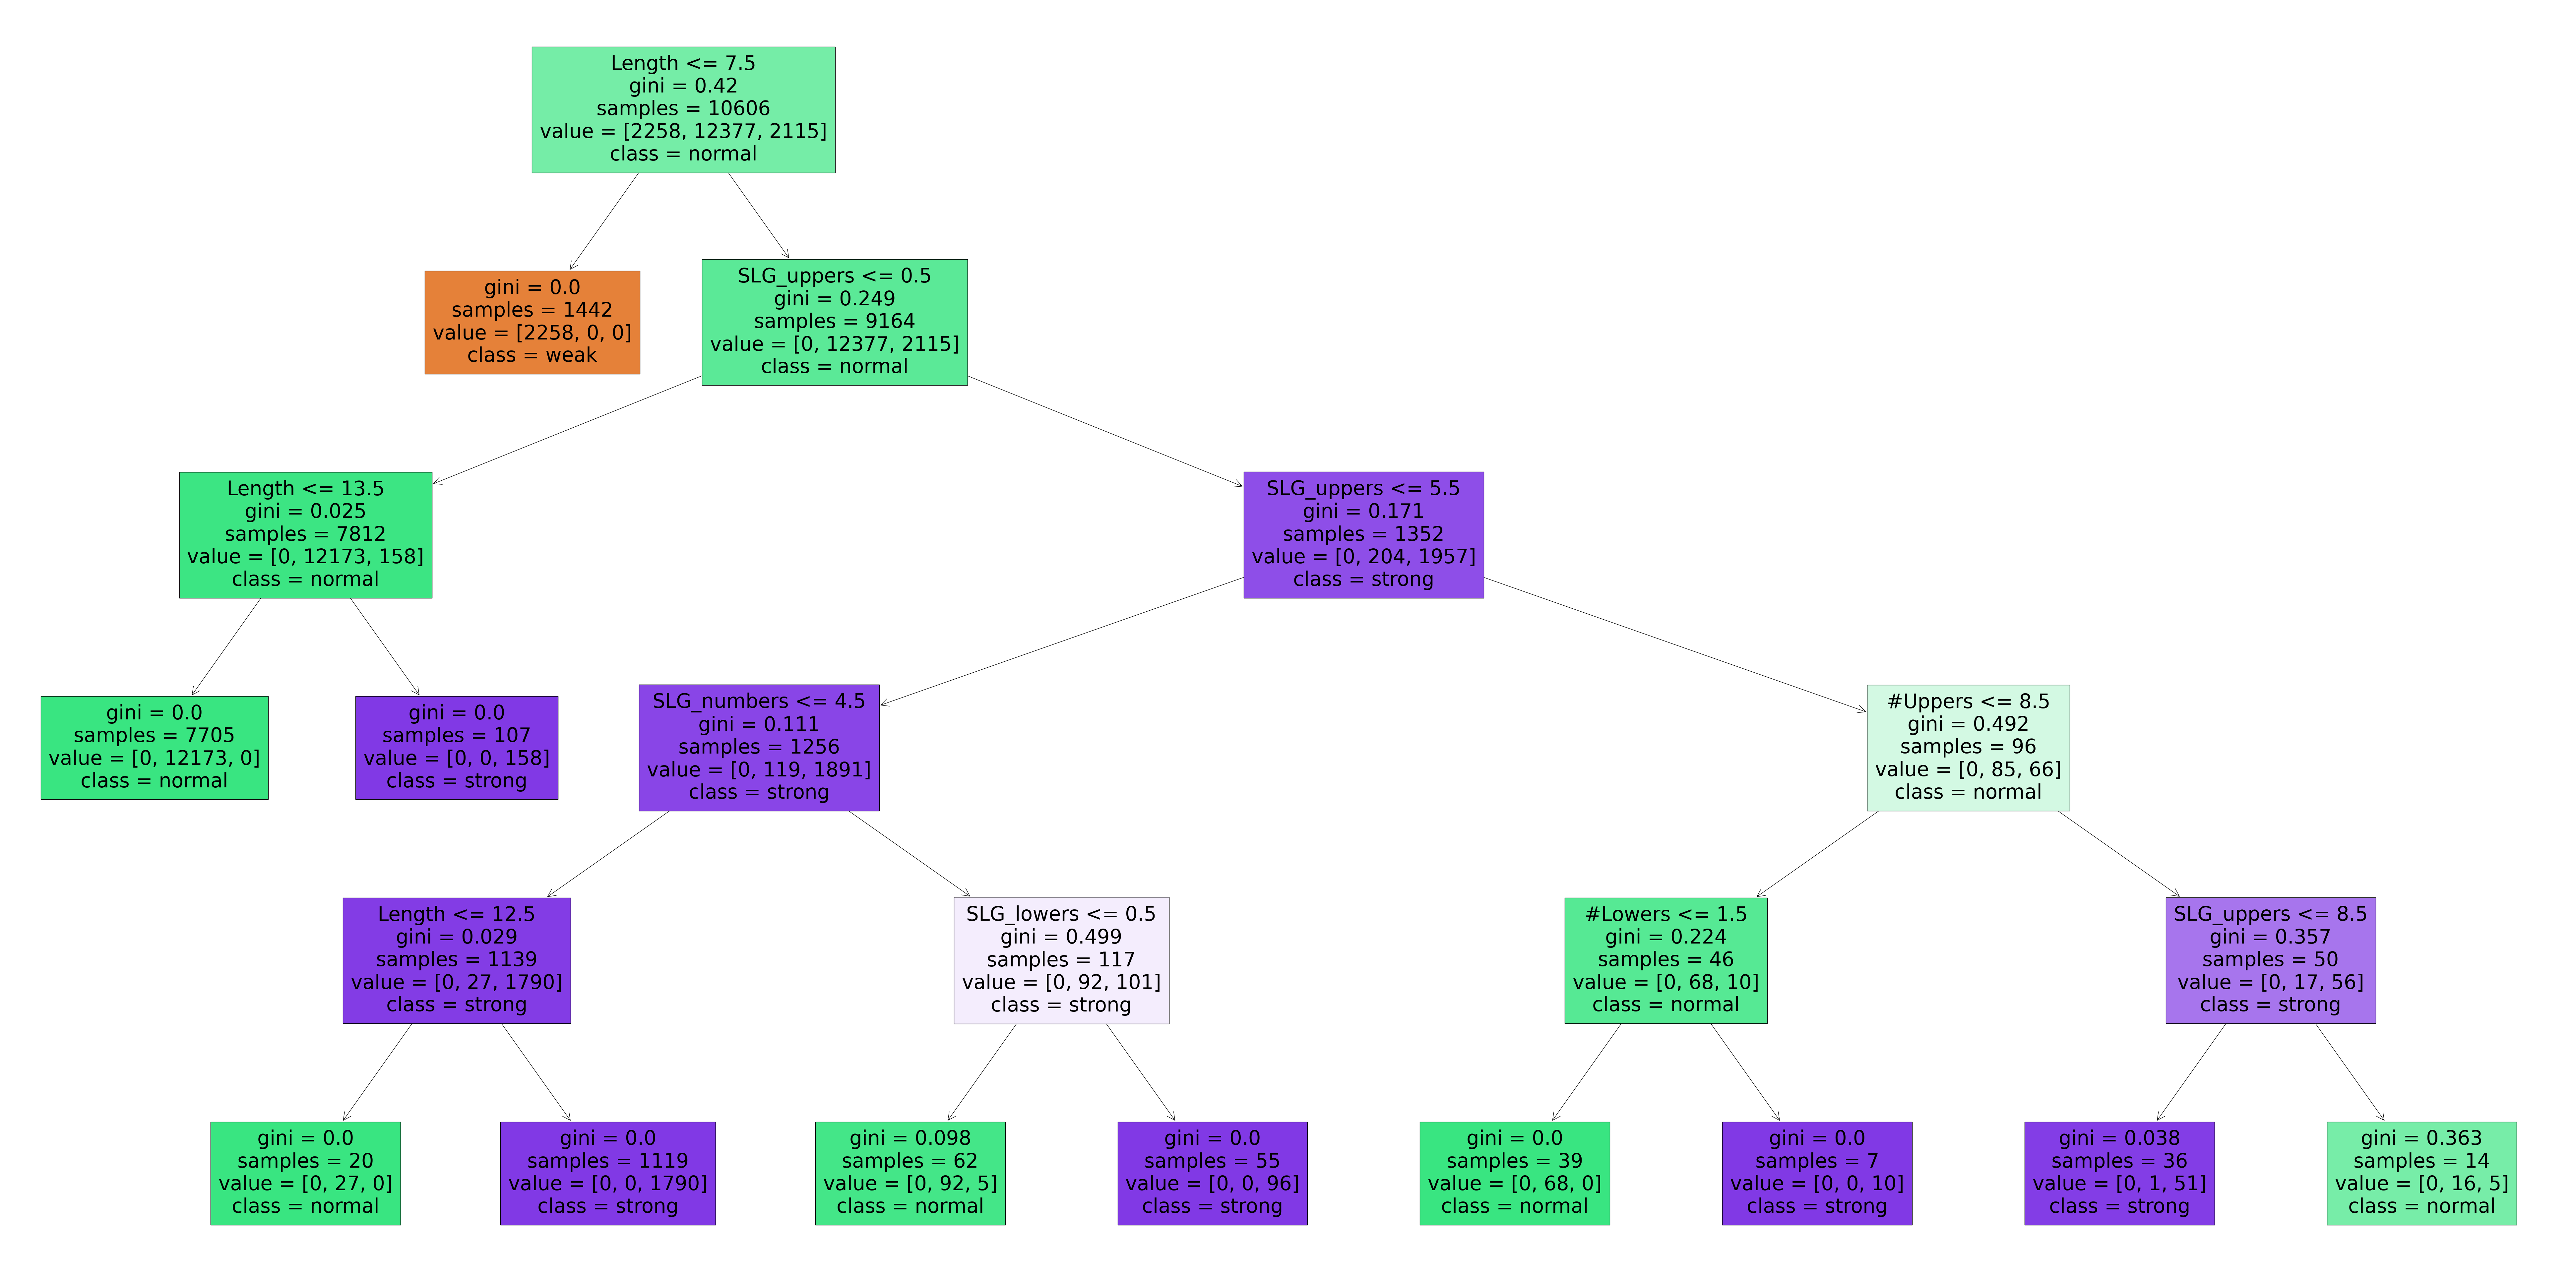

In [7]:
fig = plt.figure(figsize=(100, 50))
_ = tree.plot_tree(rf.estimators_[99], feature_names=X.columns, class_names=["weak", "normal", "strong"], filled=True)